In this tutorial, we learn how to draw a Ramachandran plot by computing backbone dihedrals of a protein structure using `protstruc`.

In [1]:
import protstruc as ps
import matplotlib.pyplot as plt
import numpy as np

/data/project/dohoon/miniconda3/envs/torch12/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Compute backbone dihedrals using `backbone_dihedrals()`

`backbone_dihedrals()` computes backbone dihedrals of a given protein structure and returns a tensor of shape `(B, L, 3)` where B is the batch size and L is the length of the protein. The last dimension denotes the three backbone dihedrals $\phi$, $\psi$ and $\omega$.

In [2]:
pdb_ids = ['1REX', '4EOT']
sb = ps.StructureBatch.from_pdb_id(pdb_ids)

dihedrals, dihedral_mask = sb.backbone_dihedrals()
dihedrals.shape

torch.Size([2, 184, 3])

## Ramachandran plots

Now plotting a Ramachandran plot is straightforward. 

We can see that protein `4EOT` is mainly composed of alpha helices.

1REX has 128 residues valid for phi/psi plot.
4EOT has 180 residues valid for phi/psi plot.


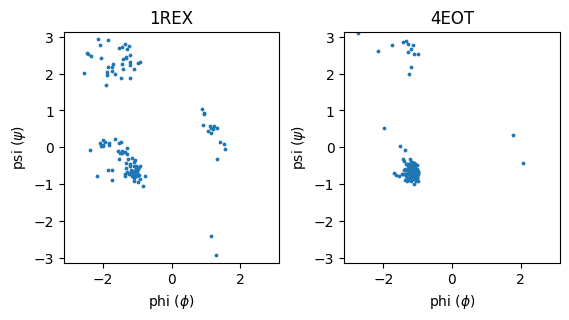

In [4]:
PHI_IDX, PSI_IDX = 0, 1
fig = plt.figure(figsize=(6.4, 3))

for i in range(2):
    residue_mask = dihedral_mask[i, :, [PHI_IDX, PSI_IDX]].all(axis=-1)
    phi, psi = dihedrals[i, residue_mask, PHI_IDX], dihedrals[i, residue_mask, PSI_IDX]

    print(f'{pdb_ids[i]} has {residue_mask.sum()} residues valid for phi/psi plot.')

    ax = fig.add_subplot(1, 2, i+1)
    ax.scatter(phi, psi, s=3)

    ax.set_xlim(-np.pi, np.pi)
    ax.set_ylim(-np.pi, np.pi)

    ax.set_xlabel('phi ($\phi$)')
    ax.set_ylabel('psi ($\psi$)')

    ax.set_title(pdb_ids[i])

plt.subplots_adjust(wspace=0.3)

## Benchmarking with `biotite.structure`

Now we check if the backbone dihedrals computed from `protstruc` is consistent with the results from `biotite.structure`.

In [5]:
import biotite.structure as struc
from biotite.structure.io.pdb import PDBFile
from biotite.database.rcsb import fetch
fetch(pdb_ids, 'pdb', '.')

['./1REX.pdb', './4EOT.pdb']

1REX has 128 residues valid for phi/psi plot
4EOT has 180 residues valid for phi/psi plot


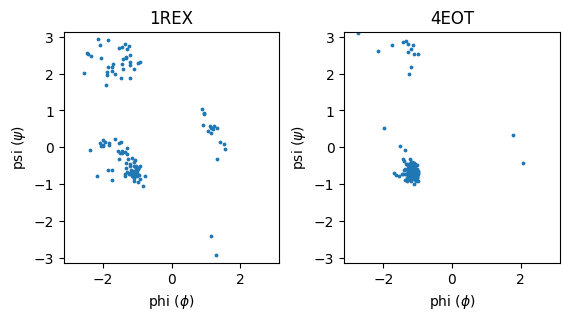

In [15]:
fig = plt.figure(figsize=(6.4, 3))

for i in range(2):
    ax = fig.add_subplot(1, 2, i+1)

    pdb_id = pdb_ids[i]
    pdb = PDBFile.read(f'{pdb_id}.pdb')
    structure = pdb.get_structure(model=1)

    phi, psi, omega = struc.dihedral_backbone(structure)
    ax.scatter(phi, psi, s=3)

    ax.set_xlim(-np.pi, np.pi)
    ax.set_ylim(-np.pi, np.pi)

    ax.set_xlabel('phi ($\phi$)')
    ax.set_ylabel('psi ($\psi$)')

    ax.set_title(pdb_ids[i])

    n_valid_residues = (~np.isnan(np.array([phi, psi]))).all(axis=0).sum()
    print(f'{pdb_ids[i]} has {n_valid_residues} residues valid for phi/psi plot')
plt.subplots_adjust(wspace=0.3)


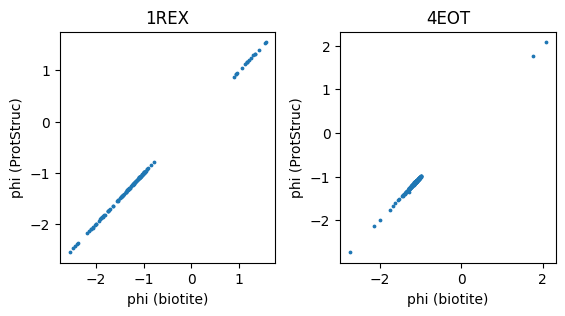

In [19]:
fig = plt.figure(figsize=(6.4, 3))

for i in range(2):
    ax = fig.add_subplot(1, 2, i+1)

    pdb_id = pdb_ids[i]
    pdb = PDBFile.read(f'{pdb_id}.pdb')
    structure = pdb.get_structure(model=1)

    phi, psi, omega = struc.dihedral_backbone(structure)
    mask = ~np.isnan(phi) & ~np.isnan(psi)
    phi, psi = phi[mask], psi[mask]

    residue_mask = dihedral_mask[i, :, [PHI_IDX, PSI_IDX]].all(axis=-1)
    my_phi, my_psi = dihedrals[i, residue_mask, PHI_IDX], dihedrals[i, residue_mask, PSI_IDX]

    ax.scatter(phi, my_phi, s=3)
    ax.set_title(pdb_ids[i])
    ax.set_xlabel('phi (biotite)')
    ax.set_ylabel('phi (ProtStruc)')
plt.subplots_adjust(wspace=0.3)


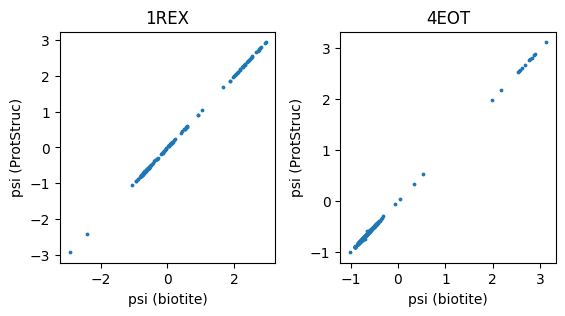

In [18]:
fig = plt.figure(figsize=(6.4, 3))

for i in range(2):
    ax = fig.add_subplot(1, 2, i+1)

    pdb_id = pdb_ids[i]
    pdb = PDBFile.read(f'{pdb_id}.pdb')
    structure = pdb.get_structure(model=1)

    phi, psi, omega = struc.dihedral_backbone(structure)
    mask = ~np.isnan(phi) & ~np.isnan(psi)
    phi, psi = phi[mask], psi[mask]

    residue_mask = dihedral_mask[i, :, [PHI_IDX, PSI_IDX]].all(axis=-1)
    my_phi, my_psi = dihedrals[i, residue_mask, PHI_IDX], dihedrals[i, residue_mask, PSI_IDX]

    ax.scatter(psi, my_psi, s=3)
    ax.set_title(pdb_ids[i])
    ax.set_xlabel('psi (biotite)')
    ax.set_ylabel('psi (ProtStruc)')

plt.subplots_adjust(wspace=0.3)
